# Example 2.6. 

### Optimal strategies of basket options

Import Tensorflow and all necessary packages

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.layers.experimental import preprocessing
import os
import IPython

Define functions

Execute the next line only if you want to use a GPU for the training

In [2]:
##IF GPU:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

First define a function to read the data

In [3]:
# # Read Data
def read_data(xpath,ypath):
    file_dir = os.path.dirname(os.path.abspath("__file__"))
    csv_folder = "csv"
   
    file_path_x = os.path.join(file_dir, csv_folder, xpath)
    df_x = pd.read_csv(file_path_x, header=None)
    df_x = df_x.dropna()
    weighted_spot = (df_x.iloc[:,0]*df_x.iloc[:,2]+df_x.iloc[:,1]*df_x.iloc[:,3])  
    file_path_y = os.path.join(file_dir, csv_folder,ypath)
    df_y = pd.read_csv(file_path_y, header=None)
    df_y = df_y.dropna()   

    return df_x,df_y

Then define a function to build a deep learning model, include Batch Normalization

In [4]:
def build_model(x,nr_neurons = 256,reg_param=0.00):   
    model = keras.Sequential([
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param),activation='relu',input_shape=[125]),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(86)
      ])
    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])
    scaler = StandardScaler().fit(x)
    return model, scaler

We train a first model for the strategies

Read the data

In [5]:
EPOCHS = 1000
X_train,y_train = read_data('x_train.csv','y_train.csv')
X_test,y_test = read_data('x_test.csv','y_test.csv')

X_train, y_train = shuffle(X_train,y_train)
X_test, y_test = shuffle(X_test,y_test)
# Consider 150 000 for training, 10 000 for testing ....
X_train = X_train.iloc[:150000,:]
y_train = y_train.iloc[:150000,:]
X_test = X_test.iloc[:10000,:]
y_test = y_test.iloc[:10000,:]


Load the Model (if desired)

In [6]:
#model=keras.models.load_model('model_basket_strats.h5')

We train the model which learns the optimal strategies

In [30]:
neurons = 512
regul = 0
BATCH_SIZE = 256

model, scaler = build_model(X_train,neurons,regul)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# # Fit the Data
history = model.fit(X_train_scaled, y_train,  epochs=EPOCHS,batch_size=BATCH_SIZE,
                    validation_split = 0.1, verbose=1,callbacks = [early_stop])

Train on 135000 samples, validate on 15000 samples
Epoch 1/1000
135000/135000 [==============================] - 3s 24us/sample - loss: 12.1201 - mae: 0.3690 - mse: 12.1201 - val_loss: 7.2261 - val_mae: 0.2440 - val_mse: 7.2261
Epoch 2/1000
135000/135000 [==============================] - 2s 16us/sample - loss: 6.5548 - mae: 0.2135 - mse: 6.5548 - val_loss: 5.0621 - val_mae: 0.1940 - val_mse: 5.0621
Epoch 3/1000
135000/135000 [==============================] - 3s 21us/sample - loss: 5.3616 - mae: 0.1862 - mse: 5.3616 - val_loss: 5.8022 - val_mae: 0.1978 - val_mse: 5.8022
Epoch 4/1000
135000/135000 [==============================] - 3s 20us/sample - loss: 4.9766 - mae: 0.1759 - mse: 4.9766 - val_loss: 4.8687 - val_mae: 0.1730 - val_mse: 4.8687
Epoch 5/1000
135000/135000 [==============================] - 2s 17us/sample - loss: 4.7704 - mae: 0.1699 - mse: 4.7704 - val_loss: 4.8074 - val_mae: 0.1692 - val_mse: 4.8074
Epoch 6/1000
135000/135000 [==============================] - 3s 21us/sa

135000/135000 [==============================] - 2s 15us/sample - loss: 2.4339 - mae: 0.1149 - mse: 2.4339 - val_loss: 2.4260 - val_mae: 0.1081 - val_mse: 2.4260
Epoch 48/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 2.2295 - mae: 0.1131 - mse: 2.2295 - val_loss: 1.9567 - val_mae: 0.1006 - val_mse: 1.9567
Epoch 49/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 2.3321 - mae: 0.1141 - mse: 2.3321 - val_loss: 2.1287 - val_mae: 0.1059 - val_mse: 2.1287
Epoch 50/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 2.2465 - mae: 0.1131 - mse: 2.2465 - val_loss: 2.3831 - val_mae: 0.1055 - val_mse: 2.3831
Epoch 51/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 2.3053 - mae: 0.1132 - mse: 2.3053 - val_loss: 2.7256 - val_mae: 0.1120 - val_mse: 2.7256
Epoch 52/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 2.3260 - mae: 0.1142 - mse: 2.3260 - val_loss: 3

135000/135000 [==============================] - 2s 16us/sample - loss: 1.7044 - mae: 0.1043 - mse: 1.7044 - val_loss: 1.8050 - val_mae: 0.1052 - val_mse: 1.8050
Epoch 94/1000
135000/135000 [==============================] - 2s 16us/sample - loss: 1.6205 - mae: 0.1028 - mse: 1.6205 - val_loss: 2.0427 - val_mae: 0.0976 - val_mse: 2.0427
Epoch 95/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 1.6924 - mae: 0.1045 - mse: 1.6924 - val_loss: 3.5232 - val_mae: 0.1262 - val_mse: 3.5232
Epoch 96/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 1.4618 - mae: 0.1011 - mse: 1.4618 - val_loss: 2.0648 - val_mae: 0.0950 - val_mse: 2.0648
Epoch 97/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 1.7169 - mae: 0.1040 - mse: 1.7169 - val_loss: 1.7661 - val_mae: 0.0954 - val_mse: 1.7661
Epoch 98/1000
135000/135000 [==============================] - 2s 15us/sample - loss: 1.6721 - mae: 0.1042 - mse: 1.6721 - val_loss: 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


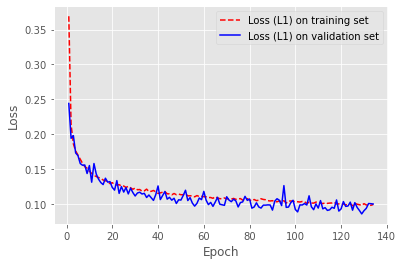

In [31]:
# Plot the training process
training_loss = history.history["mae"]
val_loss = history.history["val_mae"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, val_loss, "b-")
plt.legend(["Loss (L1) on training set", "Loss (L1) on validation set"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('./eps/history_strategies.eps', format='eps')
plt.show()
model.save("model_basket_strats.h5")

### Prices instead of strategies

Write a function that computes price bounds given a strategy

In [9]:
def compute_price_from_strat(data_row,strategy_row):
    length = len(strategy_row)
    weights_lower_bound = np.array(strategy_row[:int(length/2)])
    weights_upper_bound = np.array(strategy_row[int(length/2):])
    S_1 = data_row[0]
    S_2 = data_row[1]
    lower_bound = 0
    lower_bound += weights_lower_bound[0]*1+weights_lower_bound[1]*S_1+weights_lower_bound[2]*S_2
    lower_bound += np.sum([weights_lower_bound[3+i]*(data_row[45+i]*(weights_lower_bound[3+i]>0)+data_row[85+i]*(weights_lower_bound[3+i]<0)) for i in range(40)])
    upper_bound = 0
    upper_bound += weights_upper_bound[0]*1+weights_upper_bound[1]*S_1+weights_upper_bound[2]*S_2
    upper_bound += np.sum([weights_upper_bound[3+i]*(data_row[45+i]*(weights_upper_bound[3+i]>0)+data_row[85+i]*(weights_upper_bound[3+i]<0)) for i in range(40)])
    return -lower_bound, upper_bound

Convert the y - vector of strategies into a vector of prices

In [10]:
y_train_prices = [compute_price_from_strat(X_train.iloc[i,:],y_train.iloc[i,:]) for i in range(len(X_train))]
y_train_prices = pd.DataFrame(y_train_prices)
y_test_prices = [compute_price_from_strat(X_test.iloc[i,:],y_test.iloc[i,:]) for i in range(len(X_test))]
y_test_prices = pd.DataFrame(y_test_prices)

We write a function that builds a deep learning model to directly learn the prices

In [11]:
def build_model_prices(x,nr_neurons = 256,reg_param=0.00):
    model = keras.Sequential([
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param),activation='relu',input_shape=[125]),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(2)
      ])
    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])
    scaler = StandardScaler().fit(x)
    return model, scaler

Build the model and train it

In [12]:
#model_prices=keras.models.load_model('model_basket_prices.h5')

In [13]:
neurons = 256
regul = 0
BATCH_SIZE = 512

model_prices, _ = build_model_prices(X_train,neurons,regul)

In [14]:
# # Fit the Data
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history_prices = model_prices.fit(X_train_scaled, y_train_prices,  epochs=EPOCHS,batch_size=BATCH_SIZE,
                    validation_split = 0.2, verbose=1,callbacks = [early_stop])

Train on 120000 samples, validate on 30000 samples
Epoch 1/1000
120000/120000 [==============================] - 2s 16us/sample - loss: 1733.5467 - mae: 30.8785 - mse: 1733.5471 - val_loss: 2528.4562 - val_mae: 46.3456 - val_mse: 2528.4561
Epoch 2/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 240.9729 - mae: 13.1363 - mse: 240.9729 - val_loss: 68.4723 - val_mae: 6.6371 - val_mse: 68.4723
Epoch 3/1000
120000/120000 [==============================] - 1s 9us/sample - loss: 60.5352 - mae: 5.0844 - mse: 60.5353 - val_loss: 83.4224 - val_mae: 6.4905 - val_mse: 83.4224
Epoch 4/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 47.4929 - mae: 4.1929 - mse: 47.4930 - val_loss: 41.6023 - val_mae: 4.7813 - val_mse: 41.6023
Epoch 5/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 44.5655 - mae: 4.0317 - mse: 44.5655 - val_loss: 21.9951 - val_mae: 3.1978 - val_mse: 21.9951
Epoch 6/1000
120000/120000 [=================

120000/120000 [==============================] - 1s 8us/sample - loss: 18.6522 - mae: 2.9925 - mse: 18.6522 - val_loss: 7.6932 - val_mae: 1.7804 - val_mse: 7.6933
Epoch 47/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 17.8557 - mae: 2.8987 - mse: 17.8557 - val_loss: 13.4717 - val_mae: 2.6645 - val_mse: 13.4717
Epoch 48/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 19.7664 - mae: 3.0346 - mse: 19.7664 - val_loss: 19.8209 - val_mae: 2.8834 - val_mse: 19.8209
Epoch 49/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 18.5540 - mae: 2.9968 - mse: 18.5540 - val_loss: 8.0497 - val_mae: 1.6796 - val_mse: 8.0497
Epoch 50/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 18.6786 - mae: 2.9859 - mse: 18.6786 - val_loss: 9.6690 - val_mae: 1.7449 - val_mse: 9.6690
Epoch 51/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 17.0604 - mae: 2.9126 - mse: 17.0604 - v

120000/120000 [==============================] - 1s 8us/sample - loss: 14.1094 - mae: 2.7297 - mse: 14.1094 - val_loss: 3.1875 - val_mae: 1.1938 - val_mse: 3.1875
Epoch 93/1000
120000/120000 [==============================] - 1s 9us/sample - loss: 13.1779 - mae: 2.6530 - mse: 13.1779 - val_loss: 3.6795 - val_mae: 1.3417 - val_mse: 3.6795
Epoch 94/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 14.0954 - mae: 2.7373 - mse: 14.0954 - val_loss: 5.3292 - val_mae: 1.4959 - val_mse: 5.3292
Epoch 95/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 13.3844 - mae: 2.6879 - mse: 13.3844 - val_loss: 7.9136 - val_mae: 2.2067 - val_mse: 7.9136
Epoch 96/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 14.2368 - mae: 2.7379 - mse: 14.2368 - val_loss: 5.9524 - val_mae: 1.5402 - val_mse: 5.9524
Epoch 97/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 12.2871 - mae: 2.5709 - mse: 12.2871 - val_l

120000/120000 [==============================] - 1s 8us/sample - loss: 13.4486 - mae: 2.7750 - mse: 13.4486 - val_loss: 2.4725 - val_mae: 1.0261 - val_mse: 2.4725
Epoch 139/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 12.7471 - mae: 2.7566 - mse: 12.7471 - val_loss: 4.3354 - val_mae: 1.4150 - val_mse: 4.3354
Epoch 140/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 11.1352 - mae: 2.5042 - mse: 11.1352 - val_loss: 4.2438 - val_mae: 1.2626 - val_mse: 4.2438
Epoch 141/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 12.0283 - mae: 2.6349 - mse: 12.0283 - val_loss: 5.5127 - val_mae: 1.4211 - val_mse: 5.5127
Epoch 142/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 11.1432 - mae: 2.5098 - mse: 11.1432 - val_loss: 3.7224 - val_mae: 1.2097 - val_mse: 3.7224
Epoch 143/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 11.3081 - mae: 2.5044 - mse: 11.3081 - 

120000/120000 [==============================] - 1s 8us/sample - loss: 11.6991 - mae: 2.6347 - mse: 11.6991 - val_loss: 3.9910 - val_mae: 1.7132 - val_mse: 3.9910
Epoch 185/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.7689 - mae: 2.5385 - mse: 10.7689 - val_loss: 4.2342 - val_mae: 1.3694 - val_mse: 4.2342
Epoch 186/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.3613 - mae: 2.4726 - mse: 10.3613 - val_loss: 6.1041 - val_mae: 1.6028 - val_mse: 6.1041
Epoch 187/1000
120000/120000 [==============================] - 1s 9us/sample - loss: 11.2153 - mae: 2.5611 - mse: 11.2153 - val_loss: 3.0413 - val_mae: 1.0263 - val_mse: 3.0412
Epoch 188/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.5552 - mae: 2.4995 - mse: 10.5552 - val_loss: 4.3739 - val_mae: 1.6522 - val_mse: 4.3739
Epoch 189/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.8791 - mae: 2.5322 - mse: 10.8791 - 

120000/120000 [==============================] - 1s 8us/sample - loss: 11.0021 - mae: 2.5804 - mse: 11.0021 - val_loss: 2.1586 - val_mae: 0.9485 - val_mse: 2.1586
Epoch 231/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.2847 - mae: 2.4540 - mse: 10.2847 - val_loss: 1.7052 - val_mae: 0.8615 - val_mse: 1.7052
Epoch 232/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.4073 - mae: 2.4799 - mse: 10.4073 - val_loss: 5.2541 - val_mae: 1.5022 - val_mse: 5.2541
Epoch 233/1000
120000/120000 [==============================] - 1s 10us/sample - loss: 11.0547 - mae: 2.5913 - mse: 11.0547 - val_loss: 2.1172 - val_mae: 0.8696 - val_mse: 2.1172
Epoch 234/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.7211 - mae: 2.4264 - mse: 9.7211 - val_loss: 2.2334 - val_mae: 0.9300 - val_mse: 2.2334
Epoch 235/1000
120000/120000 [==============================] - 1s 9us/sample - loss: 11.0437 - mae: 2.5827 - mse: 11.0437 - v

120000/120000 [==============================] - 1s 8us/sample - loss: 10.5774 - mae: 2.4596 - mse: 10.5774 - val_loss: 2.1891 - val_mae: 1.1361 - val_mse: 2.1891
Epoch 277/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.4066 - mae: 2.3549 - mse: 9.4066 - val_loss: 2.8395 - val_mae: 1.2930 - val_mse: 2.8395
Epoch 278/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.9194 - mae: 2.4756 - mse: 9.9194 - val_loss: 4.3737 - val_mae: 1.4030 - val_mse: 4.3737
Epoch 279/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.6387 - mae: 2.4320 - mse: 9.6387 - val_loss: 2.6763 - val_mae: 1.0860 - val_mse: 2.6763
Epoch 280/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 8.6326 - mae: 2.2763 - mse: 8.6326 - val_loss: 2.5412 - val_mae: 1.1026 - val_mse: 2.5412
Epoch 281/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.1860 - mae: 2.3449 - mse: 9.1860 - val_loss: 

120000/120000 [==============================] - 1s 8us/sample - loss: 10.9496 - mae: 2.5854 - mse: 10.9496 - val_loss: 1.7057 - val_mae: 0.8145 - val_mse: 1.7057
Epoch 323/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 8.8236 - mae: 2.3148 - mse: 8.8236 - val_loss: 3.2400 - val_mae: 1.4104 - val_mse: 3.2400
Epoch 324/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.0767 - mae: 2.3526 - mse: 9.0767 - val_loss: 2.1178 - val_mae: 0.9768 - val_mse: 2.1178
Epoch 325/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 8.8137 - mae: 2.3244 - mse: 8.8137 - val_loss: 3.5346 - val_mae: 1.1430 - val_mse: 3.5347
Epoch 326/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 8.8185 - mae: 2.3507 - mse: 8.8185 - val_loss: 3.9157 - val_mae: 1.3337 - val_mse: 3.9157
Epoch 327/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.5745 - mae: 2.4093 - mse: 9.5745 - val_loss: 

120000/120000 [==============================] - 1s 10us/sample - loss: 8.9843 - mae: 2.3688 - mse: 8.9843 - val_loss: 2.1474 - val_mae: 1.0341 - val_mse: 2.1474
Epoch 369/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.3860 - mae: 2.3974 - mse: 9.3860 - val_loss: 1.6077 - val_mae: 0.9955 - val_mse: 1.6077
Epoch 370/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.1254 - mae: 2.3726 - mse: 9.1254 - val_loss: 1.2397 - val_mae: 0.7053 - val_mse: 1.2397
Epoch 371/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 9.7964 - mae: 2.4670 - mse: 9.7964 - val_loss: 2.1632 - val_mae: 1.0240 - val_mse: 2.1632
Epoch 372/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 10.0916 - mae: 2.4823 - mse: 10.0916 - val_loss: 2.4987 - val_mae: 0.9991 - val_mse: 2.4987
Epoch 373/1000
120000/120000 [==============================] - 1s 8us/sample - loss: 8.0420 - mae: 2.2294 - mse: 8.0420 - val_loss:

We plot the training process

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


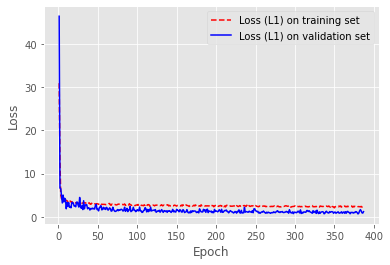

In [15]:
# Plot the training process
training_loss_prices = history_prices.history["mae"]
val_loss_prices = history_prices.history["val_mae"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss_prices) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss_prices, "r--")
plt.plot(epoch_count, val_loss_prices, "b-")
plt.legend(["Loss (L1) on training set", "Loss (L1) on validation set"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('./eps/history_prices.eps', format='eps')
plt.show()
model_prices.save("model_basket_prices.h5")

### Show Accuracy of Prediction of Parameters

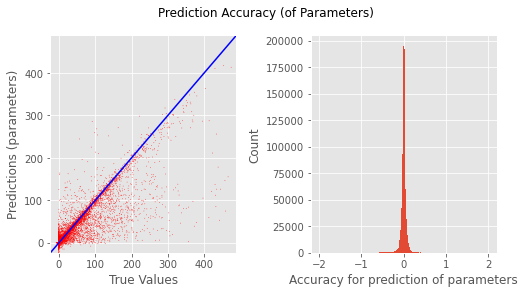

In [32]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)
fig.subplots_adjust(wspace=0.4)
test_predictions_strat = model.predict(X_test_scaled)
axs[0].plot([np.min(test_predictions_strat),np.max(test_predictions_strat)],
            [np.min(test_predictions_strat),np.max(test_predictions_strat)],color = "blue")

axs[0].set_xlim(np.min(test_predictions_strat),np.max(test_predictions_strat))
axs[0].set_ylim(np.min(test_predictions_strat),np.max(test_predictions_strat))
axs[0].scatter(y_test, test_predictions_strat,c='red',s=0.5, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions (parameters)')
# Histogram
error = np.array(test_predictions_strat - y_test).flatten()
axs[1].hist(error, bins = 200,range= (-2,2))
axs[1].set_xlabel("Accuracy for prediction of parameters")
axs[1].set_ylabel("Count")
fig.suptitle('Prediction Accuracy (of Parameters)')
plt.savefig('./eps/accuracy_strategies_parameters.eps', format='eps')
plt.show()

### Comparison of both networks

Model 1 (Training Strategies)

Model Evaluation


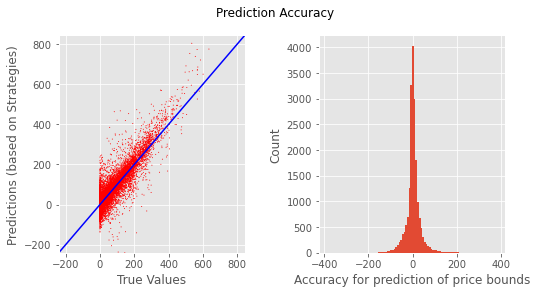

In [82]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)
fig.subplots_adjust(wspace=0.4)
#Along a line
test_predictions_strat = model.predict(X_test_scaled)
#Only consider the prices
test_predictions_strat_prices = np.array([compute_price_from_strat(X_test.iloc[i,:],test_predictions_strat[i,:]) for i in range(len(X_test))])

#a = plt.axes(aspect='equal')
axs[0].plot([np.min(test_predictions_strat_prices),np.max(test_predictions_strat_prices)],
            [np.min(test_predictions_strat_prices),np.max(test_predictions_strat_prices)],color = "blue")
axs[0].set_xlim(np.min(test_predictions_strat_prices),np.max(test_predictions_strat_prices))
axs[0].set_ylim(np.min(test_predictions_strat_prices),np.max(test_predictions_strat_prices))
axs[0].scatter(y_test_prices, test_predictions_strat_prices,c='red',s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions (based on Strategies)')
# Histogram
error = np.array(test_predictions_strat_prices - y_test_prices).flatten()
axs[1].hist(error, bins = 100)
axs[1].set_xlabel("Accuracy for prediction of price bounds")
axs[1].set_ylabel("Count")
fig.suptitle('Prediction Accuracy')

# Model Evaluation
print("Model Evaluation")
# Compute Mean absolute error manually

Model 2 (Prices directly)

Model Evaluation


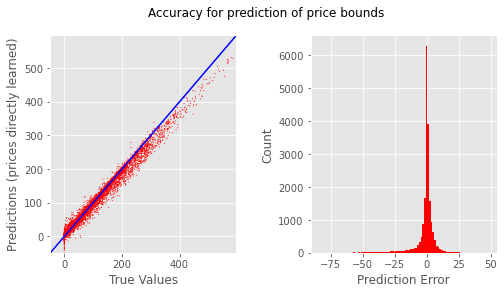

In [73]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)
fig.subplots_adjust(wspace=0.4)
#Along a line
test_predictions_prices = model_prices.predict(X_test_scaled)

#a = plt.axes(aspect='equal')
axs[0].plot([np.min(test_predictions_prices),np.max(test_predictions_prices)],
            [np.min(test_predictions_prices),np.max(test_predictions_prices)],color = "blue")
axs[0].set_xlim(np.min(test_predictions_prices),np.max(test_predictions_prices))
axs[0].set_ylim(np.min(test_predictions_prices),np.max(test_predictions_prices))
axs[0].scatter(y_test_prices, test_predictions_prices,c='red',s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions (prices directly learned)')
# Histogram
error = np.array(test_predictions_prices - y_test_prices).flatten()
axs[1].hist(error, bins = 100,color = 'red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Accuracy for prediction of price bounds')

# Model Evaluation
print("Model Evaluation")
# Compute Mean absolute error manually

Evaluation

In [86]:
print("-- Model 1: Prediction of Strategies--\n")
print("Accuracy on prediction of strategy parameters :")
mae1 = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Mean absolute error:{}\n".format(mae1))
print("\nAccuracy on prediction of prices:")
mae2 = np.sum(np.sum(np.abs(test_predictions_strat_prices-y_test_prices),1),0)/(2*len(y_test_prices))
print("Mean absolute error:{}\n".format(mae2))
mae3 = np.sum(np.sum(np.abs(test_predictions_prices-y_test_prices),1),0)/(2*len(y_test_prices))
print("-- Model 2: Prediction of Prices directly --\n")
print("Mean absolute error:{}\n".format(mae3))

-- Model 1: Prediction of Strategies--

Accuracy on prediction of strategy parameters :
Mean absolute error:0.2094452679157257


Accuracy on prediction of prices:
Mean absolute error:21.248880818039723

-- Model 2: Prediction of Prices directly --

Mean absolute error:4.071398277130912



## Relative Error

In [118]:
weighted_spot = X_test.iloc[:,0]*X_test.iloc[:,2]+X_test.iloc[:,1]*X_test.iloc[:,3]

print("-- Model 1: Prediction of Strategies--\n")
print("Accuracy on prediction of strategy parameters :")
re1 = np.sum(np.sum(np.abs(model.predict(X_test_scaled)-y_test)/np.reshape(np.repeat([weighted_spot],86),(len(X_test),86)),1),0)/(y_test.size)
print("Relative error:{}\n".format(re1))
print("\nAccuracy on prediction of prices:")
re2 = np.sum(np.sum(np.abs(test_predictions_strat_prices-y_test_prices)/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2)),1),0)/(2*len(y_test_prices))
print("Relative error:{}\n".format(re2))
re3 = np.sum(np.sum(np.abs(test_predictions_prices-y_test_prices)/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2)),1),0)/(2*len(y_test_prices))
print("-- Model 2: Prediction of Prices directly --\n")
print("Relative error:{}\n".format(re3))

-- Model 1: Prediction of Strategies--

Accuracy on prediction of strategy parameters :
Relative error:0.0015336735950239335


Accuracy on prediction of prices:
Relative error:0.18043088520973993

-- Model 2: Prediction of Prices directly --

Relative error:0.031998335216774663



Relative Accuracy (Model1)

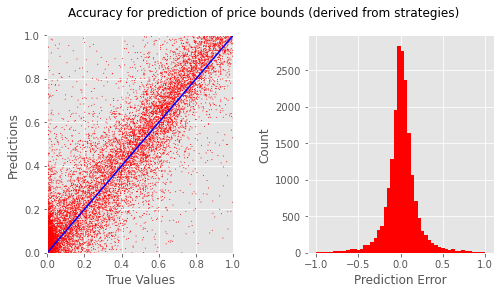

In [36]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)
fig.subplots_adjust(wspace=0.4)
#Along a line
test_predictions_strat = model.predict(X_test_scaled)
#Only consider the prices
test_predictions_strat_prices = np.array([compute_price_from_strat(X_test.iloc[i,:],test_predictions_strat[i,:]) for i in range(len(X_test))])/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2))

#a = plt.axes(aspect='equal')
axs[0].plot([0,1],
            [0,1],color = "blue")
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[0].scatter(y_test_prices/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2)), test_predictions_strat_prices,c='red',s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions')
# Histogram
error = np.array(test_predictions_strat_prices - y_test_prices/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2))).flatten()
axs[1].hist(error, bins = 50,range=(-1,1),color = 'red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Accuracy for prediction of price bounds (derived from strategies)')
plt.savefig('./eps/accuracy_strategies_relative.eps', format='eps') 

Relative Accuracy (Model2)

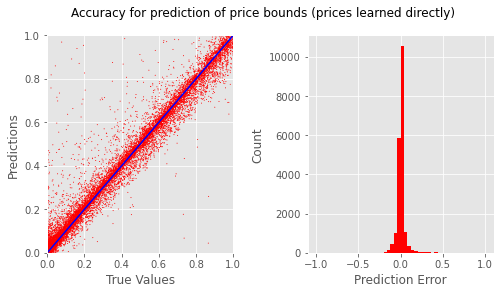

In [22]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)
fig.subplots_adjust(wspace=0.4)
#Along a line
test_predictions_prices = model_prices.predict(X_test_scaled)/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2))

#a = plt.axes(aspect='equal')
axs[0].plot([0,1],
            [0,1],color = "blue")
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[0].scatter(y_test_prices/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2)), test_predictions_prices,c='red',s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions')
# Histogram
error = np.array(test_predictions_prices - y_test_prices/np.reshape(np.repeat([weighted_spot],2),(len(X_test),2))).flatten()
axs[1].hist(error, bins = 50,range=(-1,1),color = 'red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Accuracy for prediction of price bounds (prices learned directly)')
plt.savefig('./eps/accuracy_prices_directly_relative.eps', format='eps')    